In [73]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
from sklearn.datasets import load_boston

In [75]:
boston_dataset = load_boston()

In [76]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
boston = pd.DataFrame(boston_dataset.data,
                     columns = boston_dataset.feature_names)

In [78]:
boston['MEDV'] = boston_dataset.target

## 看一下相關表

In [79]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [82]:
import seaborn as sns

## 準備訓練資料

# drop一些資料 因為相關不太高

In [83]:
boston.drop(['CHAS', 'DIS'], axis = 1, inplace = True)

In [84]:
X = boston.loc[:, "CRIM": "LSTAT"].values # 要改選擇什麼資料
Y = boston.MEDV

# 拆資料

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

## step. 開函數學習機

In [86]:
model = LinearRegression()

# step 2. 學習（訓練）

In [87]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# step 3 預測

In [88]:
y_predict = model.predict(x_test)

In [89]:
sns.set() 

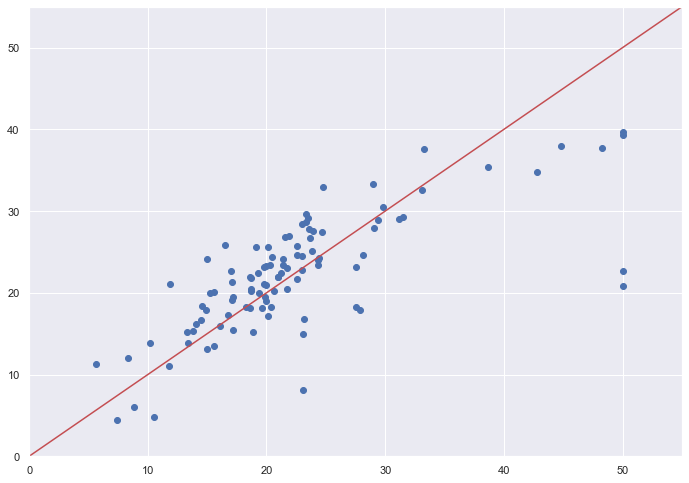

In [90]:
plt.scatter(y_test, y_predict)
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0, 55], [0, 55], 'r')

In [1]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_predict-y_test)

NameError: name 'plt' is not defined